In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import KMeans

In [2]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
## 产生模拟数据
N = 1500
centers = 4
data,y = ds.make_blobs(N, n_features=2, centers=centers, random_state=28)
data2,y2 = ds.make_blobs(N, n_features=2, centers=centers,  random_state=28)
data3 = np.vstack((data[y == 0][:200], data[y == 1][:100], data[y == 2][:10], data[y == 3][:50]))
y3 = np.array([0] * 200 + [1] * 100 + [2] * 10 + [3] * 50)

In [4]:
#一、数据前期处理跟前面模型是一样
#二、模型的构建
km = KMeans(n_clusters=centers, random_state=28)
km.fit(data, y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=28, tol=0.0001, verbose=0)

In [6]:
y_hat = km.predict(data)
print ("所有样本距离聚簇中心点的总距离和:", km.inertia_)
print ("距离聚簇中心点的平均距离:", (km.inertia_ / N))
cluster_centers = km.cluster_centers_
print ("聚簇中心点：", cluster_centers)

所有样本距离聚簇中心点的总距离和: 2592.9990199
距离聚簇中心点的平均距离: 1.72866601327
聚簇中心点： [[ -7.44342199e+00  -2.00152176e+00]
 [  5.80338598e+00   2.75272962e-03]
 [ -6.36176159e+00   6.94997331e+00]
 [  4.34372837e+00   1.33977807e+00]]


In [7]:
y_hat2 = km.fit_predict(data2)
y_hat3 = km.fit_predict(data3)

In [8]:
def expandBorder(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

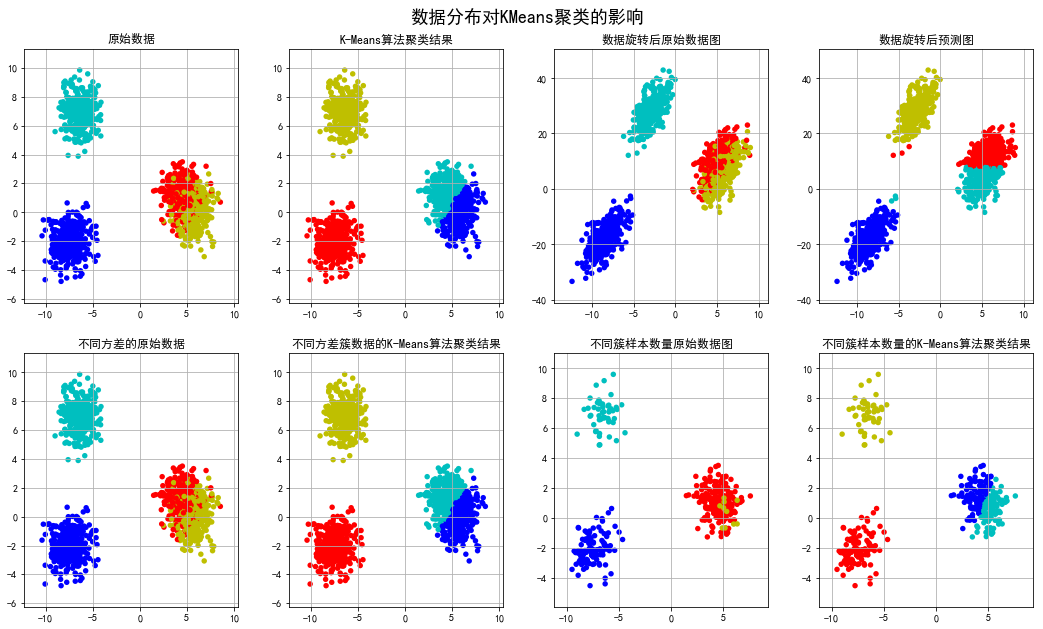

In [9]:
## 五、画图
cm = mpl.colors.ListedColormap(list('rgbmyc'))
plt.figure(figsize=(15, 9), facecolor='w')
plt.subplot(241)
plt.scatter(data[:, 0], data[:, 1], c=y, s=30, cmap=cm, edgecolors='none')

x1_min, x2_min = np.min(data, axis=0)
x1_max, x2_max = np.max(data, axis=0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'原始数据')
plt.grid(True)

plt.subplot(242)
plt.scatter(data[:, 0], data[:, 1], c=y_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'K-Means算法聚类结果')
plt.grid(True)

m = np.array(((1, 1), (0.5, 5)))
data_r = data.dot(m)
y_r_hat = km.fit_predict(data_r)
plt.subplot(243)
plt.scatter(data_r[:, 0], data_r[:, 1], c=y, s=30, cmap=cm, edgecolors='none')

x1_min, x2_min = np.min(data_r, axis=0)
x1_max, x2_max = np.max(data_r, axis=0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)

plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'数据旋转后原始数据图')
plt.grid(True)

plt.subplot(244)
plt.scatter(data_r[:, 0], data_r[:, 1], c=y_r_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'数据旋转后预测图')
plt.grid(True)

plt.subplot(245)
plt.scatter(data2[:, 0], data2[:, 1], c=y2, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data2, axis=0)
x1_max, x2_max = np.max(data2, axis=0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'不同方差的原始数据')
plt.grid(True)

plt.subplot(246)
plt.scatter(data2[:, 0], data2[:, 1], c=y_hat2, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'不同方差簇数据的K-Means算法聚类结果')
plt.grid(True)

plt.subplot(247)
plt.scatter(data3[:, 0], data3[:, 1], c=y3, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data3, axis=0)
x1_max, x2_max = np.max(data3, axis=0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'不同簇样本数量原始数据图')
plt.grid(True)

plt.subplot(248)
plt.scatter(data3[:, 0], data3[:, 1], c=y_hat3, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'不同簇样本数量的K-Means算法聚类结果')
plt.grid(True)

plt.tight_layout(2, rect=(0, 0, 1, 0.97))
plt.suptitle(u'数据分布对KMeans聚类的影响', fontsize=18)
plt.show()

In [11]:
import pygal